# BLS Labor Statistics - Quick Start Guide

© 2025 KR-Labs. All rights reserved.  
**Part of the KR-Labs Analytics Suite**

---

## Overview

The **BLS (Bureau of Labor Statistics)** connector provides access to comprehensive U.S. labor market and economic data.

**What is BLS?**
- Official U.S. labor statistics
- Employment, unemployment, wages, and productivity data
- Consumer Price Index (CPI) and inflation measures
- Industry-specific data
- Regional and state-level breakdowns

**Use Cases:**
- 💼 Labor market analysis
- 💰 Wage and compensation trends
- 📊 Inflation tracking (CPI)
- 🏭 Industry employment patterns
- 🗺️ Regional economic comparisons

**API Information:**
- Source: U.S. Bureau of Labor Statistics
- API Key: Required (free at https://www.bls.gov/developers/home.htm)
- Rate Limit: 500 requests/day (registered), 25/day (unregistered)
- Data Format: JSON → pandas DataFrame

## 1. Setup and Installation

In [1]:
# Install the package (if needed)
# pip install krl-data-connectors

# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from krl_data_connectors import BLSConnector

# Configure display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 6)

print("✅ All imports successful!")
print(f"📅 Current date: {datetime.now().strftime('%Y-%m-%d')}")

✅ All imports successful!
📅 Current date: 2025-10-19


## 2. Initialize Connector & API Key Setup

The BLS connector requires an API key for full functionality. Register at: https://www.bls.gov/developers/home.htm

**Setup Options:**
```bash
# Option 1: Environment variable (recommended)
export BLS_API_KEY="your_key_here"

# Option 2: Pass directly to connector
bls = BLSConnector(api_key="your_key_here")
```

**Rate Limits:**
- With API key: 500 requests/day, 50 series per request
- Without API key: 25 requests/day, 25 series per request

In [ ]:
# Initialize BLS connector (auto-detects BLS_API_KEY from environment)
import os
from krl_data_connectors import find_config_file

# Try to load API key from environment first
bls_api_key = os.getenv('BLS_API_KEY')

# If not in environment, try config file
if not bls_api_key:
    config_path = find_config_file('apikeys')
    if config_path:
        with open(config_path, 'r') as f:
            for line in f:
                line = line.strip()
                if 'BLS API KEY:' in line:
                    bls_api_key = line.split(':', 1)[1].strip()
                    break
        print(f"📁 Loaded API key from: {config_path}")
    else:
        print("⚠️  No API key found!")
        print("   Set BLS_API_KEY environment variable or create config file:")
        print("   - ~/.krl/apikeys")
        print("   - ~/KR-Labs/Khipu/config/apikeys")
        print("   - ./config/apikeys")

# Initialize connector
if bls_api_key:
    bls = BLSConnector(api_key=bls_api_key)
    print("✅ BLS connector initialized successfully!")
    print(f"   API Key: {bls_api_key[:10]}...")
    print("   Rate Limit: 500 requests/day, 50 series per request")
    print("\n💡 Ready to access Bureau of Labor Statistics data!")
else:
    print("⚠️  Running without API key (limited rate limits)")
    print("   Get a free key at: https://www.bls.gov/developers/home.htm")
    bls = BLSConnector()

{"timestamp": "2025-10-19T21:32:40.864796Z", "level": "INFO", "name": "BLSConnector", "message": "Connector initialized", "source": {"file": "base_connector.py", "line": 82, "function": "__init__"}, "levelname": "INFO", "taskName": "Task-21", "connector": "BLSConnector", "cache_dir": "~/.krl_cache", "cache_ttl": 3600, "has_api_key": true}
{"timestamp": "2025-10-19T21:32:40.865131Z", "level": "INFO", "name": "BLSConnector", "message": "Initialized BLS connector (API version: v2)", "source": {"file": "bls_connector.py", "line": 77, "function": "__init__"}, "levelname": "INFO", "taskName": "Task-21"}
✅ BLS connector initialized successfully!
   API Key: 869945c941...
   Rate Limit: 500 requests/day, 50 series per request
{"timestamp": "2025-10-19T21:32:40.865131Z", "level": "INFO", "name": "BLSConnector", "message": "Initialized BLS connector (API version: v2)", "source": {"file": "bls_connector.py", "line": 77, "function": "__init__"}, "levelname": "INFO", "taskName": "Task-21"}
✅ BLS co

## 3. Basic Usage: Get Consumer Price Index (CPI)

Let's retrieve the **All Urban Consumers CPI** (series ID: `CUUR0000SA0`), the headline inflation measure.

In [3]:
# Get CPI data for the last 5 years
current_year = datetime.now().year
start_year = current_year - 5

cpi = bls.get_series(
    series_id="CUUR0000SA0",
    start_year=start_year,
    end_year=current_year
)

print("📊 Consumer Price Index - All Urban Consumers (CPI-U)")
print("="*80)
print(f"Data points: {len(cpi)}")
print(f"Period: {cpi['year'].min()}-{cpi['period'].min()} to {cpi['year'].max()}-{cpi['period'].max()}")
print(f"\n📈 Recent values (last 12 months):")
print(cpi.tail(12)[['year', 'period', 'value']].to_string(index=False))

# Calculate year-over-year inflation rate
cpi_sorted = cpi.sort_values(['year', 'period'])
cpi_sorted['yoy_change'] = cpi_sorted['value'].pct_change(12) * 100
latest_inflation = cpi_sorted['yoy_change'].iloc[-1]

print(f"\n📊 Latest year-over-year inflation: {latest_inflation:.2f}%")

{"timestamp": "2025-10-19T21:32:40.871158Z", "level": "INFO", "name": "BLSConnector", "message": "Fetching BLS series: CUUR0000SA0, years 2020-2025", "source": {"file": "bls_connector.py", "line": 171, "function": "get_series"}, "levelname": "INFO", "taskName": "Task-23"}
{"timestamp": "2025-10-19T21:32:41.285264Z", "level": "INFO", "name": "BLSConnector", "message": "Retrieved 68 observations for series CUUR0000SA0", "source": {"file": "bls_connector.py", "line": 209, "function": "get_series"}, "levelname": "INFO", "taskName": "Task-23"}
📊 Consumer Price Index - All Urban Consumers (CPI-U)
Data points: 68
Period: 2020-M01 to 2025-M12

📈 Recent values (last 12 months):
year period   value
2024    M09 315.301
2024    M10 315.664
2024    M11 315.493
2024    M12 315.605
2025    M01 317.671
2025    M02 319.082
2025    M03 319.799
2025    M04 320.795
2025    M05 321.465
2025    M06 322.561
2025    M07 323.048
2025    M08 323.976

📊 Latest year-over-year inflation: 2.92%
{"timestamp": "2025-

## 4. State Unemployment Rates

Compare unemployment rates across multiple states.

In [4]:
# State unemployment rate series IDs
states = {
    'California': 'LASST060000000000003',
    'Texas': 'LASST480000000000003',
    'New York': 'LASST360000000000003',
    'Florida': 'LASST120000000000003',
    'Massachusetts': 'LASST250000000000003',
    'Rhode Island': 'LASST440000000000003'
}

# Fetch unemployment data for all states
print("📊 Fetching State Unemployment Rates...")
print("="*80)

state_data = {}
for state_name, series_id in states.items():
    data = bls.get_series(series_id=series_id, start_year=current_year-2, end_year=current_year)
    state_data[state_name] = data
    latest = data.iloc[-1]
    print(f"  {state_name:15s}: {latest['value']:.1f}% (as of {latest['year']}-{latest['period']})")

print("\n💡 Latest unemployment rates by state")

📊 Fetching State Unemployment Rates...
{"timestamp": "2025-10-19T21:32:41.297016Z", "level": "INFO", "name": "BLSConnector", "message": "Fetching BLS series: LASST060000000000003, years 2023-2025", "source": {"file": "bls_connector.py", "line": 171, "function": "get_series"}, "levelname": "INFO", "taskName": "Task-25"}
{"timestamp": "2025-10-19T21:32:41.413862Z", "level": "INFO", "name": "BLSConnector", "message": "Retrieved 32 observations for series LASST060000000000003", "source": {"file": "bls_connector.py", "line": 209, "function": "get_series"}, "levelname": "INFO", "taskName": "Task-25"}
  California     : 5.5% (as of 2025-M08)
{"timestamp": "2025-10-19T21:32:41.414643Z", "level": "INFO", "name": "BLSConnector", "message": "Fetching BLS series: LASST480000000000003, years 2023-2025", "source": {"file": "bls_connector.py", "line": 171, "function": "get_series"}, "levelname": "INFO", "taskName": "Task-25"}
{"timestamp": "2025-10-19T21:32:41.413862Z", "level": "INFO", "name": "BLSC

## 5. Visualize State Unemployment Trends

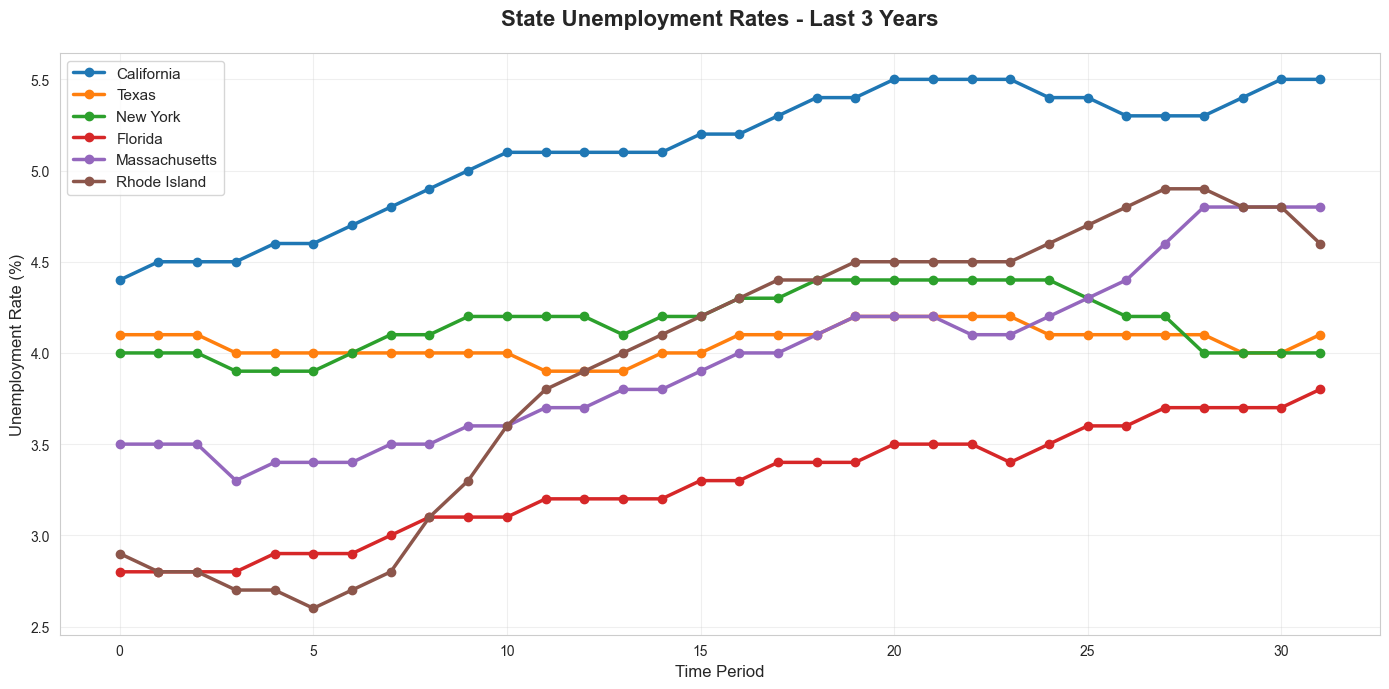

📊 State unemployment rate comparison over time


In [5]:
# Plot state unemployment trends
plt.figure(figsize=(14, 7))

colors = plt.cm.tab10(range(len(states)))
for (state_name, data), color in zip(state_data.items(), colors):
    # Create date column for x-axis
    data = data.sort_values(['year', 'period'])
    data['date_str'] = data['year'].astype(str) + '-' + data['period']
    plt.plot(range(len(data)), data['value'], label=state_name, linewidth=2.5, marker='o', color=color)

plt.title('State Unemployment Rates - Last 3 Years', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Time Period', fontsize=12)
plt.ylabel('Unemployment Rate (%)', fontsize=12)
plt.legend(fontsize=11, loc='best')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("📊 State unemployment rate comparison over time")

## 6. Understanding BLS Series IDs

BLS series IDs follow specific patterns. Here are some common series:

**National Unemployment:**
- `LNS14000000` - Unemployment Rate (Civilian)
- `LNS12000000` - Employment Level
- `LNS11300000` - Labor Force Participation Rate

**Consumer Price Index (CPI):**
- `CUUR0000SA0` - All items (headline CPI)
- `CUUR0000SA0L1E` - All items less food and energy (core CPI)
- `CUUR0000SAF` - Food
- `CUUR0000SAH` - Housing
- `CUUR0000SETB01` - Gasoline

**State Unemployment (Pattern: `LASST{FIPS}0000000000003`):**
- `LASST060000000000003` - California
- `LASST480000000000003` - Texas
- `LASST360000000000003` - New York
- `LASST440000000000003` - Rhode Island

**Employment by Industry:**
- `CES0000000001` - Total Nonfarm Employment
- `CES0500000001` - Total Private Employment
- `CES6054000001` - Professional & Technical Services

## 7. Summary & Next Steps

**What We Covered:**
- ✅ Set up BLS connector with API key
- ✅ Retrieved Consumer Price Index (CPI) data
- ✅ Fetched state unemployment rates
- ✅ Compared trends across multiple states
- ✅ Learned BLS series ID patterns

**Next Steps:**
1. Explore more series at https://www.bls.gov/data/
2. Combine BLS data with other connectors (CBP, LEHD, FRED)
3. Build labor market dashboards
4. Analyze wage trends and compensation
5. Track inflation by category

**Resources:**
- 📚 [BLS Data Homepage](https://www.bls.gov/data/)
- 🔑 [Get API Key](https://www.bls.gov/developers/home.htm)
- 📖 [BLS API Docs](https://www.bls.gov/developers/api_signature_v2.htm)
- 🔍 [Series ID Finder](https://www.bls.gov/help/hlpforma.htm)
- 💻 [GitHub Repository](https://github.com/KR-Labs/krl-data-connectors)
- 📊 [More Examples](https://github.com/KR-Labs/krl-data-connectors/tree/main/examples)